# Проверка гипотез для увеличения выручки

Вместе с отделом маркетинга крупного интернет-магазина был подготовилен список гипотез для увеличения выручки.
Нам необходимо приоритизировать гипотезы, провести A/B-тест и проанализировать результаты.

**План работы**

- **Шаг 1. Откроем файлы с данными, изучим общую информацию и подготовим данные**

    Путь к файлам:
    -  /datasets/hypothesis.csv
    -  /datasets/orders.csv
    -  /datasets/visitors.csv
     
    
- **Шаг 2. Проведем приоритизацию гипотез**

    В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
    - Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
    - Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета;
    - Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.
    
    
- **Шаг 3. Анализ A/B-теста**

    Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
    Проанализируем A/B-тест:
    - Построим график кумулятивной выручки по группам. Сделаем выводы и предположения;
    - Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения;
    - Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения;
    - Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения;
    - Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения;
    - Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения;
    - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей;
    - Построим точечный график стоимостей заказов. Сделаем выводы и предположения;
    - Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов;
    - Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения;
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения;
    - Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения;
    - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения;
    - Примем решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
      
      
- **Шаг 4. Напишем общий вывод**


- **Описание данных**

   Файл `/datasets/hypothesis.csv` (гипотезы по увеличению выручки интернет-магазина):

    - `Hypothesis` — краткое описание гипотезы
    - `Reach` — охват пользователей по 10-балльной шкале
    - `Impact` — влияние на пользователей по 10-балльной шкале
    - `Confidence` — уверенность в гипотезе по 10-балльной шкале
    - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы

  Файл `/datasets/orders.csv` (результаты A/B-теста):

    - `transactionId` — идентификатор заказа
    - `visitorId` — идентификатор пользователя, совершившего заказ
    - `date` — дата, когда был совершён заказ
    - `revenue` — выручка заказа
    - `group` — группа A/B-теста, в которую попал заказ

  Файл `/datasets/visitors.csv` (результаты A/B-теста):

    - `date` — дата
    - `group` — группа A/B-теста
    - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


## Загрузка данных и подготовка их к анализу
Загрузим данные в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/hypothesis.csv. 
 -   /datasets/orders.csv. 
 -   /datasets/visitors.csv.

### Обзор данных

Откроем таблицы и посмотрим общую информацию о них.

In [1]:
# импорт необходимых библиотек
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# чтение файлов с данными и сохранение в переменных
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('C:/Users/tatar/downloads/hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('C:/Users/tatar/downloads/orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('C:/Users/tatar/downloads/visitors.csv')

# вывод первых 5 строк таблиц
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [3]:
# получение общей информации о данных
hypothesis.info()
print('\n')
orders.info()
print('\n')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 

In [4]:
# подсчет дубликатов в таблицах
print(hypothesis.duplicated().sum()) 
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


**Выводы**

* Необходимо заменить названия столбцов, привести их к нижнему регистру и правильному стилю;
* Необходимо привести к правильному типу данные в столбцах, содержащих информацию о дате и времени;
* Пропуски отсутствуют;
* Дубликаты отсутствуют.

### Предобработка данных

Заменим названия столбцов, приведём к нижнему регистру и правильному стилю.

In [5]:
# переименование столбцов
hypothesis.rename(str.lower, axis='columns', inplace=True) 
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}) 

# проверка
print(hypothesis.columns) 
print(orders.columns) 

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Преобразуем данные, содержащие информацию о дате и времени в формат `datetime`.

In [6]:
# изменение типа данных, содержащих информацию о дате и времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# проверка
print(orders['date'].dtypes)
print(visitors['date'].dtypes) 

datetime64[ns]
datetime64[ns]


**Выводы**

Таким образом, мы сделали следующее:
* Заменили названия столбцов, привели их к нижнему регистру и правильному типу;
* Привели к правильному типу данные в столбцах, содержащих информацию о дате и времени.

## Приоритизация гипотез

Проведем приоритизацию гипотез, изпользуя фреймворки `ICE` и `RICE`.

Применим фреймворк ICE для приоритизации гипотез. Добавим в таблицу hypothesis столбец с результатами расчета ICE и отсортируем гипотезы по убыванию приоритета.

In [7]:
pd.set_option('display.max_colwidth', None) # настройка отображения ширины столбца по содержимому

hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


**Наиболее перспективные гипотезы по ICE:**

* 8 - Запустить акцию, дающую скидку на товар в день рождения;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Применим фреймворк RICE для приоритизации гипотез. Добавим в таблицу hypothesis столбец с результатами расчета RICE и отсортируем гипотезы по убыванию приоритета.

In [8]:
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Наиболее перспективные гипотезы по RICE:**

* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

**Выводы**

- Наболее перспективная гипотеза по ICE под номером 8 оказалась на пятом месте при расчете RICE. Это можно объяснить значением показателя `reach` - количество пользователей, которое затронет изменение. Этот фактор оказал влияние и на другие гипотезы;
- Тем не менее, комплексно учитывая результаты обеих приоритизаций гипотез можно выделить наиболее важные из них:
    * 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    * 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    * 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. 

Проведем анализ результатов A/B-теста.

Для начала проверим сколько групп у нас в A/B-тесте.

In [9]:
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


В результатах A/B-теста 2 группы (А и В).

Теперь определим даты начала и окончания A/B-теста.

In [10]:
print('Дата начала A/B-теста по таблице orders:', min(orders['date'].dt.date))
print('Дата окончания A/B-теста по таблице orders:', max(orders['date'].dt.date))
print('\n')
print('Дата начала A/B-теста по таблице visitors:', min(visitors['date'].dt.date))
print('Дата окончания A/B-теста по таблице visitors:', max(visitors['date'].dt.date))

Дата начала A/B-теста по таблице orders: 2019-08-01
Дата окончания A/B-теста по таблице orders: 2019-08-31


Дата начала A/B-теста по таблице visitors: 2019-08-01
Дата окончания A/B-теста по таблице visitors: 2019-08-31


Период тестирования совпадает по обеим таблицам.

Определим количество пользователей в каждой группе. Для этого сформируем вспомогательный датафрейм `orders_by_group` на базе таблицы `orders`, в ктором будут колонки со следующими столбцами: `unique_group_size` - количество уникальных пользователей в группе, `group_size` - общее количество пользователей в группе, `both_groups_size` - количество пользователей, входящих в обе группы.

In [11]:
orders_by_group = (
    orders.groupby('group')
    .agg({'visitor_id': ['nunique', 'count']})
)
orders_by_group.columns = ['unique_group_size', 'group_size']
orders_by_group['both_groups_size'] = orders_by_group['group_size'] - orders_by_group['unique_group_size']
orders_by_group

,unique_group_size,group_size,both_groups_size
group,,,
A,503,557,54
B,586,640,54


**Выводы**

По предварительному анализу результатов A/B-теста:
- Проверили, что групп по тестированию две, А и В;
- Определили, что тест проходил в интервале с 01-08-2019 по 31-08-2019;
- Определили размеры групп, в группе А - 503 пользователя, в В - 586 пользователей, 54 пользователя входят в обе группы.

### График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные. Сформируем датафрейм `cumulative_data` со столбцами:

- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [12]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x:
                                       orders[np.logical_and(
                                           orders['date'] <= x['date'],
                                           orders['group'] == x['group'])]
                                       .agg({'date' : 'max',
                                             'group' : 'max',
                                             'transaction_id' : 'nunique',
                                             'visitor_id' : 'nunique',
                                             'revenue' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x:
                                         visitors[np.logical_and(
                                             visitors['date'] <= x['date'],
                                             visitors['group'] == x['group'])]
                                         .agg({'date' : 'max',
                                               'group' : 'max',
                                               'visitors' : 'sum'}),
                                         axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

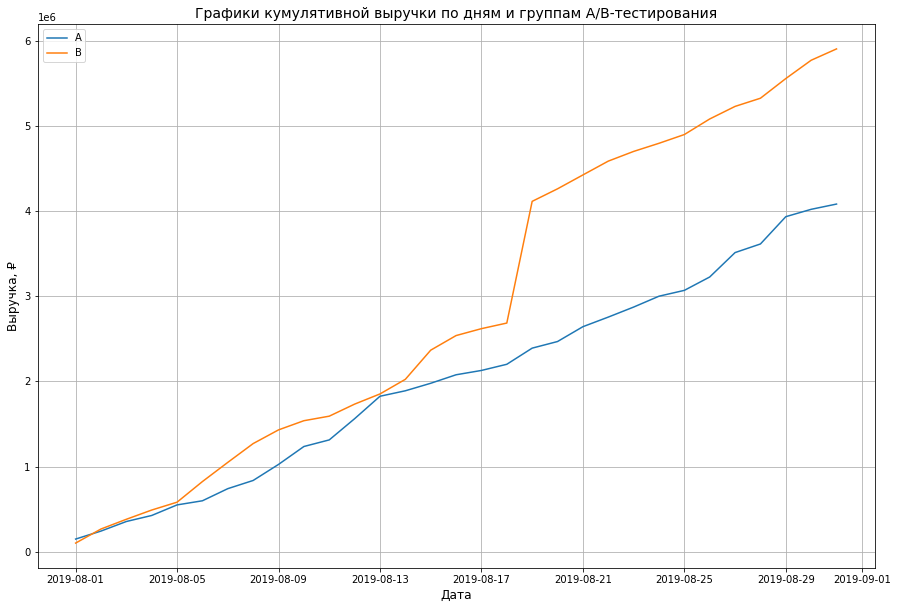

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, ₽', fontsize=12)
plt.legend() 
plt.show()

**По графикам можно сделать такие выводы:**
- Выручка почти равномерно увеличивается в течение всего теста в обеих группах.
- Однако график выручки группы B в одной точке резко вырос. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке в этот конкретный период.

### График кумулятивного среднего чека по группам

Построим графики кумулятивного среднего чека по дням и группам A/B-тестирования.

Для этого разделим кумулятивную выручку на кумулятивное число заказов.

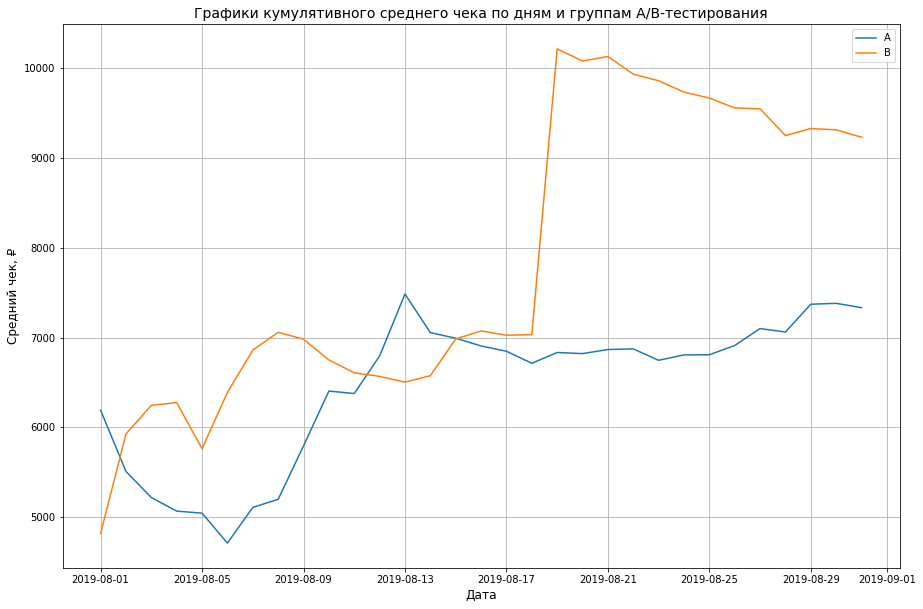

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, ₽', fontsize=12)
plt.legend() 
plt.show()

**По графикам можно сделать такие выводы:**
- Средний чек в группе А после падения и резкого роста стал более равномерным с тенденцией к росту.
- Средний чек в группе B в одной точке резко вырос, как и выручка (предположение о крупных заказах). Имеется некоторая тенденция к снижению среднего чека в этой группе. Величины среднего чека обеих групп разные.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

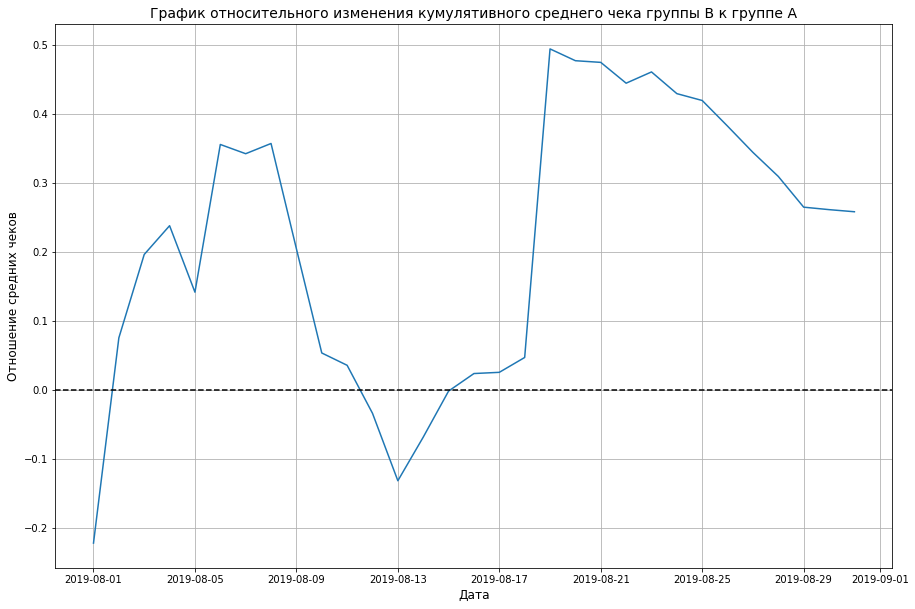

In [15]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/
          merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/
          merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.show()

**По графику можно сделать такие выводы:**
- В нескольких точках график различия между сегментами резко «скачет». Это говорит о наличии крупных заказов.

### График кумулятивной конверсии по группам

Построим график кумулятивной конверсии по группам.

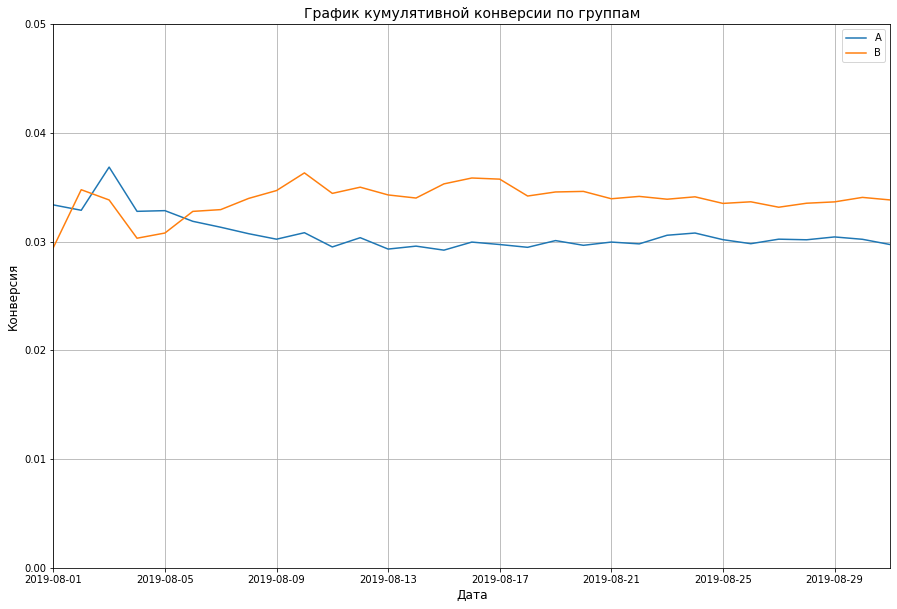

In [16]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# задаём размер для графиков
plt.figure(figsize=(15, 10))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('График кумулятивной конверсии по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.legend()
plt.show()

**По графику можно сделать такие выводы:**
- Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы A просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

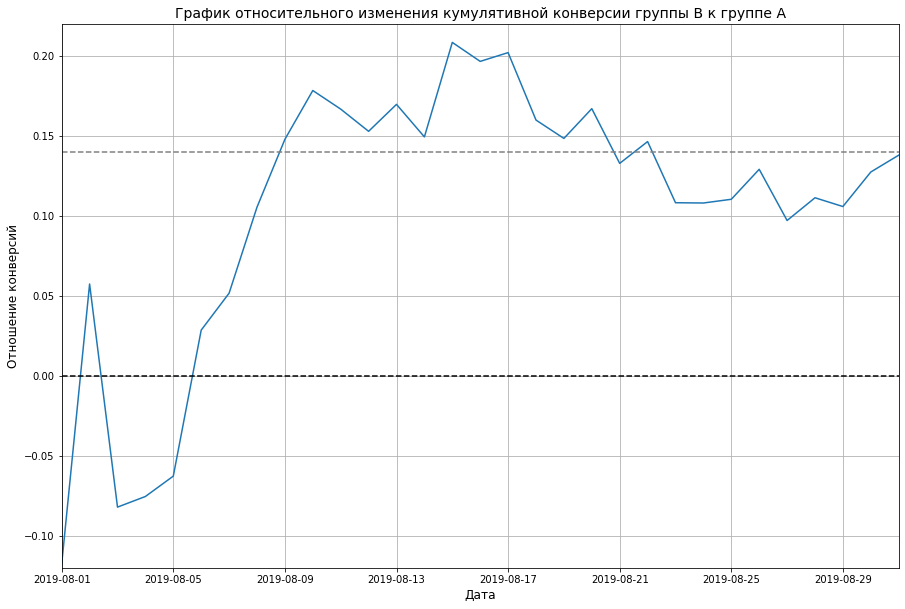

In [17]:
# собираем данные в одном датафрейме
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# задаём размер для графика
plt.figure(figsize=(15, 10))

# cтроим отношение конверсий
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1)

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.12, 0.22])

plt.grid(visible=True)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение конверсий', fontsize=12)
plt.show()

**По графику можно сделать такие выводы:**
- В начале теста группа B проигрывала группе A, затем вырвалась вперёд и постепенно растёт.
- В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Необходимо проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

Для начала сформируем датафрейм `orders_by_users` для того, чтобы посмотреть число заказов по пользователям.

In [18]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .sort_values(by='transaction_id', ascending=False)
    .rename(columns={'transaction_id': 'orders'})
)

display(orders_by_users.head(10))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Мы определили, что существует несколько пользователей с большим количеством заказов.

Построим гистрограмму распределения количества заказов на одного пользователя.

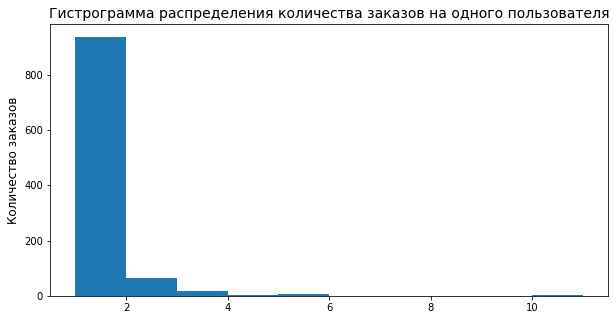

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(orders_by_users['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

Большинство покупателей заказывали только один раз. Однако есть пользователи с количеством заказов 2-4.

Построим точечный график количества заказов по пользователям.

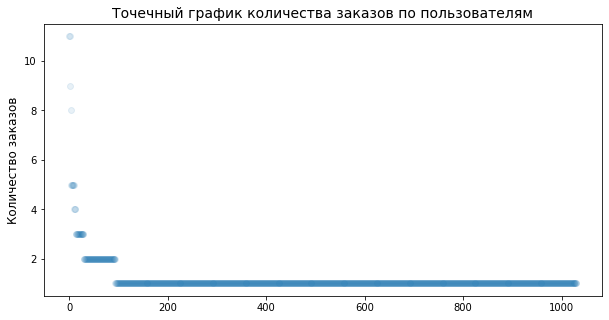

In [20]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.1)
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

**По графикам можно сделать такие выводы:**
- Есть некоторое количество пользователей с количеством заказов 2-4. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [21]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


**Выводы**
* Не более 5% пользователей оформляли больше чем 2 заказа;
* 1% пользователей заказывали более 4 раз;
* Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов

Для начала посмотрим на топ-10 самых дорогих заказов по стоимости.

In [22]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Мы определили, что несколько пользователей совершили заказы на большие суммы.

Построим гистрограмму распределения стоимостей заказов.

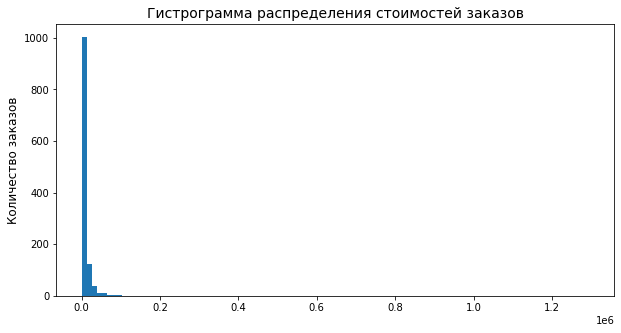

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(orders['revenue'], bins=100) 
plt.title('Гистрограмма распределения стоимостей заказов', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.show()

По такой гистограмме нельзя сделать выводы, поэтому построим точечный график распределения стоимостей заказов.

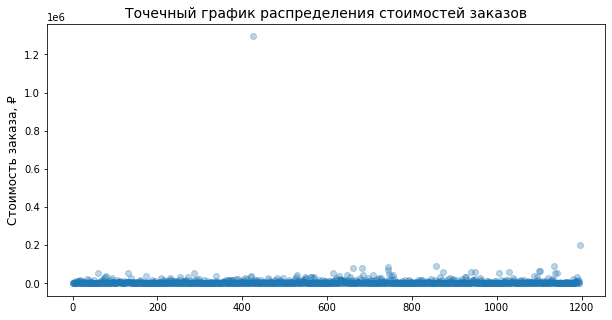

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.show()

Для более детального анализа построим точечный график с измененным масштабом. 

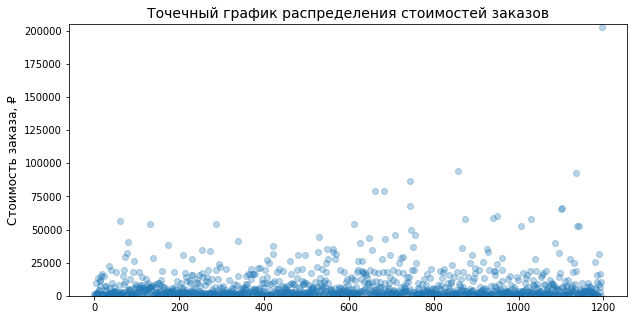

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.ylim(0, 205000)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа, ₽', fontsize=12)
plt.show()

**По графикам можно сделать такие выводы:**
- Есть некоторое количество дорогих заказов. По графику можно выбрать границу аномальных заказов между 25 000 и 60 000 рублями. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных пользователей

Рассчитаем 95-й и 99-й перцентили стоимости заказов.

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Выводы**
* Не более 5% заказов имеют стоимость больше чем 28 000 рублей;
* 1% заказов стоит более 58 233.2 рублей;
* Разумно выбрать 28 000 рублей за нижнюю границу стоимости заказов, и отсеять аномальные заказы по ней.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы:
   * H₀ - различий в конверсии между группами нет;
   * H₁ - различия в конверсии между группами есть.
   
Для расчета статистической значимости различий в конверсии между группами нам необходимо подготовить имеющиеся данные. Сформируем новый датафрейм `data` со следующими столбцами:

- `date` - дата;
- `orders_per_date_a` - количество заказов в выбранную дату в группе A;
- `revenue_per_date_a` - суммарная выручка в выбранную дату в группе A;
- `orders_per_date_b` - количество заказов в выбранную дату в группе B;
- `revenue_per_date_b` - суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_a` - суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_a` -  суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_b` - суммарное число заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_b` -  суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_a` - количество пользователей в выбранную дату в группе A;
- `visitors_cummulative_a` -  количество пользователей до выбранной даты включительно в группе A;
- `visitors_per_date_b` - количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_b` -  количество пользователей до выбранной даты включительно в группе B.

In [27]:
# расчет количества пользователей в выбранную дату в группе А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# расчет количества пользователей до выбранной даты включительно в группе А
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# расчет количества пользователей в выбранную дату в группе В
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# расчет количества пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# расчет количества заказов и суммарной выручки в выбранную дату в группе A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# расчет суммарного числа заказов до выбранной даты включительно в группе A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# расчет количества заказов и суммарной выручки в выбранную дату в группе В
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# расчет суммарного числа заказов до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# объединение датафреймов в один общий
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `orders_by_users_a` и `orders_by_users_b` со столбцами `['visitor_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Объявим переменные `sample_a` и `sample_b`, в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули. Посчитаем статистическую значимость различия конверсии по результатам месяца теста. Применим тест Манна-Уитни. Выведем p-value для сравнения конверсии между группами. Вычислим и выведем относительное различие в конверсии между группами.

In [28]:
# формирование датафреймов в которых указано число совершённых заказов
# для пользователей, которые заказывали хотя бы 1 раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

# формирование переменных в которых пользователям с заказами
# будет соответствовать число заказов пользователя,
# а пользователям без заказов — нули
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «сырым» данным:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.017
Относительное различие в средней конверсии между группами по «сырым» данным: 0.138


**Выводы**
* p-value = 0.017, что меньше 0.05. Это означает, что нулевую гипотезу об отсутствии различий по «сырым» данным в конверсии между группами можно отвергнуть. 
* Средняя конверсия группы В больше средней конверсии группы А.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:
   * H₀ - различий в среднем чеке между группами нет;
   * H₁ - различия в среднем чеке между группами есть.
   
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

In [29]:
# рассчет статистической значимости различия среднего чека по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# рассчет относительного различия в среднем чеке между группами
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительное различие в среднем чеке между группами по «сырым» данным: 0.259


**Выводы**
* p-value = 0.729, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
* Средний чек группы В сильно больше среднего чека группы А.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Вспомним, что найденные ранее 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей и запишем это в переменных `many_orders` и `expensive_orders`. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 28 000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`. А также узнаем, сколько всего аномальных пользователей методом `shape()`.

In [30]:
many_orders = np.percentile(orders_by_users['orders'], 95)
expensive_orders = np.percentile(orders['revenue'], 95)
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']
abnormal_users = (pd.concat([
    users_with_many_orders,
    users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print('\n')
print('Количество аномальных пользователей:', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


Количество аномальных пользователей: 74


Узнаем, как действия 74 пользователей повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста и применим статистический критерий Манна-Уитни к полученным выборкам.

Гипотезы:
   * H₀ - различий в конверсии между группами нет;
   * H₁ - различия в конверсии между группами есть.

In [31]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в средней конверсии между группами по «очищенным» данным:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.013
Относительное различие в средней конверсии между группами по «очищенным» данным: 0.173


**Выводы**
* p-value = 0.013, что меньше 0.05. Это означает, что нулевую гипотезу об отсутствии различий по «очищенным» данным в конверсии между группами можно отвергнуть. По «сырым» данным p-value был равен 0.017.
* Средняя конверсия группы В больше средней конверсии группы А. Относительное различие в конверсии между группами по «сырым» данным было равно 0.138.
* Результаты по «очищенным» данным незначительно отличаются от результатов по «сырым» данным.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:
   * H₀ - различий в среднем чеке между группами нет;
   * H₁ - различия в среднем чеке между группами есть.
   
Передадим критерию `mannwhitneyu()` данные о выручке с заказов без учета аномальных пользователей и также найдём относительные различия в среднем чеке между группами.

In [32]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
      '{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.738
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.020


**Выводы**
* p-value = 0.738, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу и считать, что в среднем чеке по «очищенным» данным есть различия, нет. По «сырым» данным p-value был равен 0.729.
* Однако по «очищенным» данным средний чек группы А больше среднего чека группы В. По «сырым» данным было наоборот, относительное различие в среднем чеке между группами составляло 0.259.

## Общий вывод

Основной задачей исследования было приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Для проведения корректного анализа, пришлось обработать имеющиеся данные:

* Заменить названия столбцов, привести их к нижнему регистру и правильному стилю;
* Привести к правильному типу данные в столбцах, содержащих информацию о дате и времени.

В ходе приоритизирования гипотез по фреймворкам ICE и RICE удалось определить наиболее важные из них:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(гипотеза №7);
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(гипотеза №0);
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(гипотеза №6).

Выделим основные тезисы анализа результатов A/B-теста:

* Кумулятивный средний чек группы В выше среднего чека группы А на 25.9% к концу теста;
* Кумулятивная конверсия группы В выше конверсии группы А на 13.8% к концу теста;
* Не более 5% от всех пользователей оформляли больше чем 2 заказа, 1% пользователей заказывали более 4 раз;
* Не более 5% от всех заказов имеют стоимость больше чем 28 000 рублей, 1% заказов стоит более 58 233.2 рублей;
* Статистически значимое различие по конверсии между группами присутствует и по «сырым» данным, и по данным после фильтрации аномалий. Относительное различие в средней конверсии между группами (отношение средней конверсии группы В к средней конверсии группы А): 0.138 по «сырым» данным и 0.173 по «очищенным» данным;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Относительное различие в среднем чеке между группами (отношение среднего чека группы В к среднему чеку группы А): 0.259 по «сырым» данным и -0.020 по «очищенным» данным;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть значительная тенденция к улучшению.
* График различия среднего чека говорит о том, что результаты группы B несмотря на попытки роста имеют некоторую тенденцию к снижению, сказалось в том числе влияние крупных заказов. По «очищенным» данным средний чек группы А оказался больше среднего чека группы В.
* Исходя из обнаруженных фактов, тест следует продолжить. Несмотря на то, что конверсия сегмента B лучше сегмента A, есть основания полагать, что пристутствует тенденция к снижению среднего чека сегмента В. Необходимо её отследить, а для это потребуется больше времени. Исходя из зарождающейся тендеции роста на графике различия конверсии между группами приблизительно за две недели до окончания теста, можно назначить период продолжения тестирования в две недели.